<a href="https://colab.research.google.com/github/gargishita/MachineLearning/blob/main/DSML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**One Hot Encoding**

In [ ]:
import numpy as np

def one_hot_encode(categories):
    unique_categories = sorted(set(categories))
    category_dict = {}
    for i, cat in enumerate(unique_categories):
      category_dict[cat] = i

    one_hot_matrix = np.zeros((len(categories), len(unique_categories))) # zero matrix

    for i, category in enumerate(categories):
        one_hot_matrix[i, category_dict[category]] = 1

    return one_hot_matrix, category_dict

categories = ["Red", "Blue", "Green", "Blue", "Red", "Green"]

one_hot_matrix, mapping = one_hot_encode(categories)

print("Category Mapping:", mapping)
print("\nOne-Hot Encoded Matrix:\n", one_hot_matrix)

Category Mapping: {'Blue': 0, 'Green': 1, 'Red': 2}

One-Hot Encoded Matrix:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


**Dummy Variable Encoding**

In [ ]:
import numpy as np

def dummy_encode(categories):
    unique_categories = sorted(set(categories))
    category_dict = {}
    for i, cat in enumerate(unique_categories):
        category_dict[cat] = i

    one_hot_matrix = np.zeros((len(categories), len(unique_categories)))

    for i, category in enumerate(categories):
        one_hot_matrix[i, category_dict[category]] = 1

    dummy_matrix = one_hot_matrix[:, :-1]

    return dummy_matrix, category_dict

categories = ["Red", "Blue", "Green", "Blue", "Red", "Green"]

dummy_matrix, mapping = dummy_encode(categories)

print("Category Mapping:", mapping)
print("\nDummy Encoded Matrix:\n", dummy_matrix)

Category Mapping: {'Blue': 0, 'Green': 1, 'Red': 2}

Dummy Encoded Matrix:
 [[0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]]


**Linear Regression using Gradient Descent**

In [ ]:
import numpy as np

def compute_cost(X, y, w, b):
    m = len(y)
    predictions = np.dot(X, w) + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, w, b, learning_rate=0.01, num_iterations=1000):
    m = len(y)

    for i in range(num_iterations):
        predictions = np.dot(X, w) + b
        error = predictions - y

        dw = (1 / m) * np.dot(X.T, error)
        db = (1 / m) * np.sum(error)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        cost = compute_cost(X, y, w, b)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return w, b

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([5, 7, 9, 11, 13])

w = np.zeros(X.shape[1])
b = 0

w, b = gradient_descent(X, y, w, b, learning_rate=0.01, num_iterations=1000)

print(f"Optimized weight (w): {w}")
print(f"Optimized bias (b): {b}")

Iteration 0: Cost 34.6963
Iteration 100: Cost 0.3337141598957511
Iteration 200: Cost 0.23791239347915374
Iteration 300: Cost 0.1696131415454953
Iteration 400: Cost 0.12092105570554441
Iteration 500: Cost 0.08620736329573453
Iteration 600: Cost 0.06145918461462799
Iteration 700: Cost 0.04381564670452959
Iteration 800: Cost 0.031237168344716494
Iteration 900: Cost 0.022269685821966746
Optimized weight (w): [2.1158847]
Optimized bias (b): 2.581619456736265


**Confusion Matrix and F1 Score**

In [ ]:
import numpy as np

y_actual = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred =   np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

def confusion_matrix_manual(y_actual, y_pred):
    TP = np.sum((y_actual == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_actual == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_actual == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_actual == 1) & (y_pred == 0))  # False Negatives

    return np.array([[TN, FP], [FN, TP]]), TP, TN, FP, FN

def precision_recall_f1(TP, TN, FP, FN):
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

conf_matrix, TP, TN, FP, FN = confusion_matrix_manual(y_actual, y_pred)
print("Confusion Matrix (Manually Computed):\n", conf_matrix)

precision, recall, f1_score = precision_recall_f1(TP, TN, FP, FN)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Confusion Matrix (Manually Computed):
 [[4 1]
 [1 4]]

Precision: 0.8
Recall: 0.8
F1 Score: 0.8000000000000002


**Cross Validation**

**K-Fold**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
X = np.random.rand(100, 3)
y = np.random.randint(0, 2, 100)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

K-Fold Cross-Validation Scores: [0.55 0.45 0.5  0.35 0.4 ]
Mean Accuracy: 0.45


**Stratified K-Fold**

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

stratified_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

print("Stratified K-Fold Scores:", stratified_scores)
print("Mean Accuracy:", np.mean(stratified_scores))

Stratified K-Fold Scores: [0.6  0.45 0.6  0.5  0.35]
Mean Accuracy: 0.5


**LOOCV**

In [ ]:
from sklearn.model_selection import LeaveOneOut
import numpy as np

loo = LeaveOneOut()

loo_scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')

print("LOOCV Scores:", loo_scores)
print("LOOCV Mean Accuracy:", np.mean(loo_scores))

LOOCV Scores: [0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0.]
LOOCV Mean Accuracy: 0.47


**Multilinear Regression**

Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.02327770606409
Mean Squared Error: 0.5558915986952444
R² Score: 0.5757877060324508


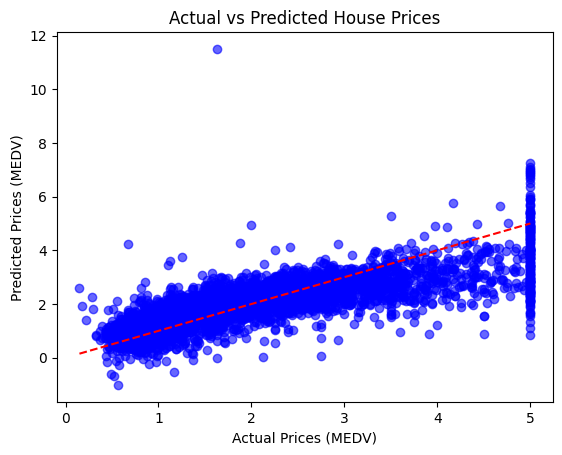

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MEDV'] = california.target

X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Predicted Prices (MEDV)")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.show()

**ROC Curve**

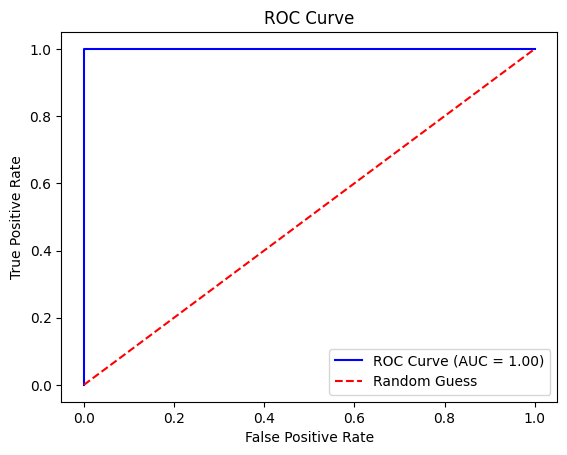

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

X = np.array([[18], [19], [20], [21], [22], [23], [24], [25], [26], [27],
              [28], [29], [30], [31], [32], [33], [34], [35], [36], [37],
              [38], [39], [40], [41], [42], [43], [44], [45], [46], [47]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**KNN**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN classifier (using k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00


**Decision Tree**

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00


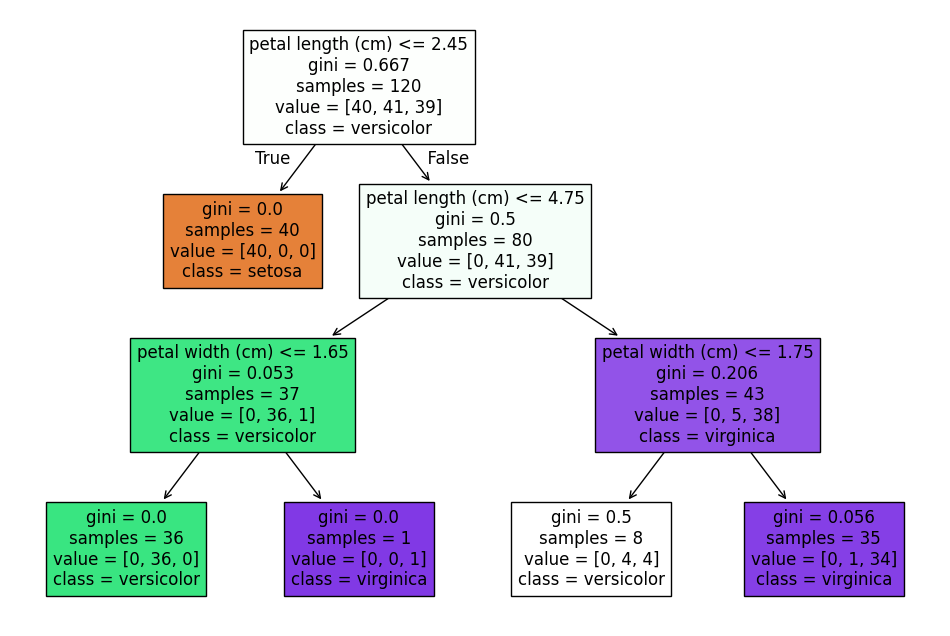

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier
dtree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Make predictions
y_pred = dtree.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()